### <font face='Liberation serif' size=4>**Загружаем библиотеки**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

<font face='Liberation serif' size=4>**Отключаем предупреждения**</font>

In [2]:
warnings.filterwarnings('ignore')

### <font face='Liberation serif' size=4>**Загружаем датасет**</font>

In [3]:
df = pd.read_csv('/ya/auto_kz_2019.csv', sep=';', decimal=',')

<font face='liberation serif' size=5 color='red'><b>Пояснение загрузки:</b></font>

<font face='Liberation serif' size=4 color='crimson'>***Здесь при загрузке используем достаточно редкий аргумент `decimal` - знак, который отделяет целое число от десятичной части, обычно по умолчанию это точка, но в датасетах, созданных в эксель, очень часто разделителем является запятая - чтобы числовые данные в таком случае отображались корректно мы используем параметр `decimal` со значением запятая.***
    
***sep (от separator) определяет символ, которым столбцы отделяются друг от друга, по умолчанию - это запятая, но в нашем случае используется второй по частоте символ - точка с запятой, поэтому указываем разделитель в параметре `sep`, третьим по частоте использования является табуляция - указывается вот так при загрузке - `sep='\t'`***</font>

<font face='Liberation serif' size=4>Смотрим на датасет</font>

In [4]:
start_shape = df.shape
print(f'Итого имеем {start_shape[0]} наблюдений с {start_shape[1]} признаками')

Итого имеем 39966 наблюдений с 25 признаками


<font face='Liberation serif' size=4>Мне сразу не нравятся названия колонок - с русскими названиями + пробелы работа будет происходить очень медленно. Под замену.</font>

In [5]:
df.sample(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
26535,2019,Январь,Toyota Motor Kazakhstan,Toyota,Camry,B4,2018,Российская Федерация,Бензин,2.5,...,Физ. Лицо,NaN,1.0,29626.35212,29626.35212,г.Алматы,Легковые автомобили,D класс,D,Импорт
2754,2019,Январь,Astana Motors,Hyundai,Accent,Hyundai Accent HCr Active Plus,2019,Республика Казахстан,Бензин,"1,6",...,Физ. Лицо,NaN,1.0,15037.81834,15037.81834,г.Нур-Султан,Легковые автомобили,B класс,B,Локальное производство
39877,2019,Июль,Allur Auto,Yutong,ZK6108HGH,Bus,2019,Республика Казахстан,Дизель,"6,7L",...,Юр. Лицо,безналичный,1.0,91979.00697,91979.00697,Костанайская область,Коммерческие автомобили,Средние автобусы,O,Локальное производство
37695,2019,Июль,Вираж,UAZ,Patriot,23632-253+КУНГ Легковой,2018,Российская Федерация,Бензин,"2,7",...,Юр. Лицо,безналичный,1.0,19008.12623,19008.12623,г.Алматы,Внедорожники,Среднеразмерные SUV,K2,Импорт
28881,2019,Июнь,Toyota Motor Kazakhstan,Toyota,Camry,B5,2019,Российская Федерация,Бензин,2.5,...,Физ. Лицо,NaN,1.0,32904.23741,32904.23741,г.Нур-Султан,Легковые автомобили,D класс,D,Импорт


<font face='Liberation serif' size=4>Зачищаем названия колонок для удобства работы (приводим к snake_case)</font>

In [6]:
# печатаем колонки для удобства
df.columns

Index(['Год', 'Месяц', 'Компания', 'Бренд', 'Модель', 'Модификация',
       'Год выпуска', 'Страна-производитель', 'Вид топлива', 'Объём двиг, л,',
       'Коробка передач', 'Тип привода', 'Сегмент', 'Регион',
       'Наименование дилерского центра', 'Тип клиента', 'Форма расчета',
       'Количество', 'Цена, USD', 'Продажа, USD', 'Область',
       'Сегментация 2013', 'Класс 2013', 'Сегментация Eng',
       'Локализация производства'],
      dtype='object')

In [7]:
# сохраняем текущие названия колонок в список
columns_start = df.columns.tolist()

In [8]:
# создаем список колонок, который будем использовать, согласно snake_case
columns_end = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year', 'manufacturing_country', 'fuel_type',
         'engine_volume', 'transmission_type', 'drive_type', 'segment', 'region', 'dealer', 'client_type', 'payment_type', 
         'quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 'class_2013', 'segment_eng', 'product_localization']

In [9]:
# создаем словарь с ключами из старых колонок и значениями из новых колонок
change_col_dict = {k:v for k, v in zip(columns_start, columns_end)}

In [10]:
# распечатаем словарь для проверки - количество колонок совпадает с исходным, для каждой есть значение в словаре
change_col_dict

{'Год': 'year',
 'Месяц': 'month',
 'Компания': 'company',
 'Бренд': 'brand',
 'Модель': 'model',
 'Модификация': 'modification',
 'Год выпуска': 'release_year',
 'Страна-производитель': 'manufacturing_country',
 'Вид топлива': 'fuel_type',
 'Объём двиг, л,': 'engine_volume',
 'Коробка передач': 'transmission_type',
 'Тип привода': 'drive_type',
 'Сегмент': 'segment',
 'Регион': 'region',
 'Наименование дилерского центра': 'dealer',
 'Тип клиента': 'client_type',
 'Форма расчета': 'payment_type',
 'Количество': 'quantity',
 'Цена, USD': 'price_usd',
 'Продажа, USD': 'sell_price_usd',
 'Область': 'state',
 'Сегментация 2013': 'segment_2013',
 'Класс 2013': 'class_2013',
 'Сегментация Eng': 'segment_eng',
 'Локализация производства': 'product_localization'}

In [11]:
# производим замену названий колонок
df = df.rename(columns=change_col_dict)

In [12]:
# проверяем
df.sample(5)

,year,month,company,brand,model,modification,release_year,manufacturing_country,fuel_type,engine_volume,...,client_type,payment_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,segment_eng,product_localization
21444,2019,Июнь,Nissan Manufacturing RUS,Nissan,Terrano,Elegance Plus,2019,Российская Федерация,Бензин,2,...,NaN,NaN,1.0,16805.50550,16805.50550,Павлодарская область,Внедорожники,Полноразмерные SUV,K3,Импорт
25630,2019,Июнь,БИПЭК АВТО,Skoda,Rapid,NaN,2019,Республика Казахстан,Бензин,"1,6",...,NaN,NaN,6.0,13900.00000,83400.00000,г.Алматы,Легковые автомобили,B класс,B,Локальное производство
16165,2019,Март,БИПЭК АВТО,Kia,Picanto,NaN,2018,Республика Казахстан,Бензин,"1,248",...,NaN,NaN,2.0,10900.00000,21800.00000,г.Алматы,Легковые автомобили,A класс,A,Локальное производство
4509,2019,Август,Astana Motors,Hyundai,Accent,Hyundai Accent HCr Elegance & Style & Prestige...,2019,Республика Казахстан,Бензин,"1,6 MPI",...,Физ. Лицо,кредит,1.0,18334.53456,18334.53456,Мангистауская область,Легковые автомобили,B класс,B,Локальное производство
36616,2019,Август,Toyota Motor Kazakhstan,Toyota,RAV4,Z1,2019,Российская Федерация,Бензин,2.0,...,Физ. Лицо,NaN,1.0,26273.46560,26273.46560,г.Нур-Султан,Внедорожники,Компактные SUV,K1,Импорт


<font face='Liberation serif' size=4>**Посмотрим на пропуски**</font>

In [13]:
df.isna().sum()

year                         0
month                        0
company                      0
brand                        0
model                        0
modification              3591
release_year               501
manufacturing_country        0
fuel_type                 3140
engine_volume             4258
transmission_type         3255
drive_type                4289
segment                   6761
region                       0
dealer                       0
client_type               7047
payment_type             25928
quantity                     6
price_usd                    0
sell_price_usd               0
state                        0
segment_2013                 0
class_2013                   0
segment_eng                  0
product_localization         0
dtype: int64

<font face='Liberation serif' size=4>**Удаляем колонки**</font>

In [14]:
df = df.drop(columns=['dealer', 'payment_type', 'segment', 'segment_eng', 'product_localization', 'client_type', 'modification'])

<font face='Liberation serif' size=4>Удаляем локализацию, так как она легко восстанавливается по колонке страна-производитель, сегменты (кроме 2013), типы клиентов и типы оплат заказчику были не важны - удаляем, для скорости заказчик решил не восстаналивать данные по модификациям машин, поэтому удаляем пропуски.</font>

In [15]:
# удаляем оставшиеся пропущенные значения
df = df.dropna()

In [16]:
# посмотрим на остатки данных
end_shape = df.shape
end_shape

(34846, 18)

In [17]:
print(f'Потери количества продаж: {(start_shape[0] - end_shape[0]) / start_shape[0]:.2%}')

Потери количества продаж: 12.81%


<font face='Liberation serif' size=4>В итоге теряем порядка 13 процентов базы. Для общего анализа по брендам модификации не важны, так что для вводной части мы не будем удалять пропуски (сделаем отдельное исследование, где используем данные с пропусками)</font>

In [18]:
df.isna().sum()

year                     0
month                    0
company                  0
brand                    0
model                    0
release_year             0
manufacturing_country    0
fuel_type                0
engine_volume            0
transmission_type        0
drive_type               0
region                   0
quantity                 0
price_usd                0
sell_price_usd           0
state                    0
segment_2013             0
class_2013               0
dtype: int64

<font face='Liberation serif' size=4>**Пройдемся по столбцам**</font>

<font face='Liberation serif' size=4 color='blue'>*Закодируем <b>страны-производители</b>*</font>

In [19]:
# смотрим на уникальные значения в столбце
df.manufacturing_country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'UK', 'Венгрия',
       'Турция', 'Испания', 'Таиланд', 'Узбекистан', 'Польша', 'Швеция',
       'Белоруссия', 'Китай', 'Бельгия'], dtype=object)

In [20]:
# выгружаем значения в список 
countries_start = df.manufacturing_country.unique().tolist()

In [21]:
# открываем список для подсказки
countries_start

['Германия',
 'США',
 'Австрия',
 'Республика Казахстан',
 'Российская Федерация',
 'Корея',
 'Япония',
 'UK',
 'Венгрия',
 'Турция',
 'Испания',
 'Таиланд',
 'Узбекистан',
 'Польша',
 'Швеция',
 'Белоруссия',
 'Китай',
 'Бельгия']

In [22]:
# качаем кодировку стран в виде название страны - трехбуквенный код
# я прошелся по трем сайтам - с сайта Лебедева таблица отлично скачалась методом панд read_html
# данные скачались в виде списка, по опыту знаю, что таблица обычно первым элементом идет (индекс 0)
# поэтому добавляем нулевой индекс и оставляем три столбца, которые нам необходимы: название, полное название, код страны
countries_list = (
    pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
                  [['Наименование', 'Полное наименование', 'Alpha3']]
                  .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'})
)

In [23]:
# выбираем из списка страны, которые нам нужны из столбцов имя и полное имя, так как в датасете названия корявые
countries_change_list = countries_list.query('name in @countries_start | full_name in @countries_start')

In [24]:
# проверяем - не хватает 4 стран - добавим их в словарь руками, так как это быстрее нежели автоматизация
countries_change_list

,name,full_name,Alpha3
2,Австрия,Австрийская Республика,AUT
22,Бельгия,Королевство Бельгии,BEL
37,Венгрия,Венгерская Республика,HUN
51,Германия,Федеративная Республика Германия,DEU
78,Испания,Королевство Испания,ESP
82,Казахстан,Республика Казахстан,KAZ
91,Китай,Китайская Народная Республика,CHN
165,Польша,Республика Польша,POL
170,Россия,Российская Федерация,RUS
201,Таиланд,Королевство Таиланд,THA


In [25]:
# делаем два словаря: по имени страны и по полному имени страны
countries_change_dict = {k:v for k, v in zip(countries_change_list.name, countries_change_list.Alpha3)}
countries_change_dict_full = {k:v for k, v in zip(countries_change_list.full_name, countries_change_list.Alpha3)}

In [26]:
# добавляем недостающие страны в любой из словарей
countries_change_dict['UK'] = 'UK'
countries_change_dict['США'] = 'USA'
countries_change_dict['Корея'] = 'KOR'
countries_change_dict['Белоруссия'] = 'BLR'

In [27]:
# применяем оба словаря к столбцу страны
df.manufacturing_country = df.manufacturing_country.map(lambda x: countries_change_dict.get(x, x))
df.manufacturing_country = df.manufacturing_country.map(lambda x: countries_change_dict_full.get(x, x))

In [28]:
# проверяем - все страны перекодировались - отсутствующих данных нет (NaN)
df.manufacturing_country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'UK', 'HUN',
       'TUR', 'ESP', 'THA', 'UZB', 'POL', 'SWE', 'BLR', 'CHN', 'BEL'],
      dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Закодируем <strong>тип топлива</strong>*</font>

In [29]:
# Смотрим на уникальные значения
df.fuel_type.unique()

array(['Бензин', 'Дизель', 'дизель ', 'бензин ', 'гибрид', '2', '1,6',
       '0', 'Электро'], dtype=object)

In [30]:
# Смотрим на количество аномалий в столбце: 1.6, 2 и так далее
df.query('fuel_type in ["1,6", "0", "2"]').shape

(40, 18)

<font face='Liberation serif' size=4>Всего 40 - удаляем</font>

In [31]:
df = df.query('fuel_type not in ["1,6", "0", "2"]')

In [32]:
# Приводим названия к нижнему регистру и заменяем электричество на электро (короче название - меньше памяти используется)
df.fuel_type = df.fuel_type.str.lower().str.replace('электричество', 'электро').str.replace(' ', '')

In [33]:
# проверяем - все ок
df.fuel_type.unique()

array(['бензин', 'дизель', 'гибрид', 'электро'], dtype=object)

In [34]:
# кодируем названия
df.fuel_type = df.fuel_type.str.lower().map({'бензин':'F', 'дизель':'D', 'электро':'E', 'гибрид':'HYB'})

In [35]:
# проверяем замены
df.fuel_type.unique()

array(['F', 'D', 'HYB', 'E'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Разберемся с <b>типом привода</b>*</font>

In [36]:
# смотрим на уникальные значения - видно, что сборка была из нескольких баз: полный хаос
df.drive_type.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', 'RWD', '2 WD', '2WD', '4 WD', '4X2',
       'Передний (FF)', 'FF', '#Н/Д', 'полный', '4Motion'], dtype=object)

In [37]:
# смотрим на количество значений #НД - их всего 4 - удаляем 
df.query('drive_type == "#Н/Д"').shape

(4, 18)

In [38]:
def change_drive_type(cell):
    '''
    функция для приведения значений столбца привод к единому формату
    argument (cell): ячейка столбца 'drive_type'
    '''
    if cell in ['4WD', 'quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion']:
        return '4WD'
    if cell in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']:
        return 'FWD'
    if cell in ['Задний', 'RWD']:
        return 'RWD'
    if cell in ['4х2.2', '2 WD', '2WD', '4X2']:
        return '2WD'
    else:
        return np.NaN

In [39]:
# применяем функцию для очистки значений
df.drive_type = df.drive_type.apply(change_drive_type)

In [40]:
# проверяем
df.drive_type.unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

In [41]:
df.drive_type.isna().sum()

4

In [42]:
# удаляем данные,которые были НД
df = df.dropna()

<font face='Liberation serif' size=4 color='blue'>*Приведем колонки <b>количество, стоимость</b> и <b>итоговая стоимость</b> к числовым типам данных, количество к int, так продаются целые машины*</font>

In [43]:
# посмотрим на значения в столбце: есть минус один и сто - проверим
df.quantity.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        18.,  37.,  12.,  17.,  15.,  24.,  29.,  14.,  13.,  25.,  63.,
        23.,  30.,  21.,  60.,  22.,  16.,  19.,  35.,  28.,  32.,  54.,
       115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,  26.,  31.,
        34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.])

In [44]:
# это скорее всего возврат машины - удалим его
df.query('quantity == -1')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
25728,2019,Август,БИПЭК АВТО,Skoda,Superb,2019,KAZ,F,2,6DSG,4WD,Тараз,-1.0,35588.25,-35588.25,Жамбылская область,Легковые автомобили,D класс


In [45]:
df = df.query('quantity != -1')

In [46]:
# тут скорее всего оптовик - судя по Scoda Octavia с двигателем 1.4 и механической коробкой передач - таксопарк
df.query('quantity == 100')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
25555,2019,Июль,БИПЭК АВТО,Skoda,Octavia,2019,KAZ,F,"1,4",6MT,FWD,Тараз,100.0,18700.0,1870000.0,Жамбылская область,Легковые автомобили,C класс


In [47]:
# вариант смены типа данных номер один
df.quantity = df.quantity.astype('int')

In [48]:
# вариант приведения к числовому типу данных номер два - из плюсов можно прописать поведение при ошибках преобразования
# параметромs errors, тип данных указывается в downcast
for col in ['price_usd', 'sell_price_usd']:
    df[col] = pd.to_numeric(df[col])

<font face='Liberation serif' size=4 color='blue'>*Создадим единый столбец даты продажи из столбцов год и месяц*</font>

In [49]:
df.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

In [50]:
df.month = df.month.map({'Май':'05', 
                        'Август':'08',
                        'Апрель':'04',
                        'Июль':'07',
                        'Февраль':'02',
                        'Июнь':'06',
                        'Сентябрь':'09',
                        'Январь':'01',
                        'Март':'03'})

In [51]:
# создаем столбец дата продажи путем совмещения столбцов год и месяц, а чтобы дата попадала под типовой формат,
# добавляем еще '01' - день месяца (номер дня неважен, так как все равно внутри месяца разбивки по датам нет)
df['sales_date'] = df.year.astype('str') + '-' + df.month + '-01'

In [52]:
# приводим столбец к формату дата (dt.date в конце используется, чтобы убрать значение времени из формата, оставив только дату)
df['sales_date'] = pd.to_datetime(df.sales_date, format='%Y-%m-%d').dt.date

<font face='Liberation serif' size=4 color='blue'>*Проверим столбец <b>год выпуска</b>*</font>

In [53]:
# смотрим на значения - есть два интересных - скорее всего это 2018 и 2019 - просто коряво прочитанные
# вопрос по годам так же был задан владельцам - они подтвердили, что 18 и 19 годы
df.release_year.unique()

array(['2018', '2017', '2019', '2016', '2014', '2013', '2\xa0018',
       '2\xa0019'], dtype=object)

In [54]:
# меняем два значения и приводим столбец к цельночисельному типу
df.release_year = df.release_year.replace('2\xa0018', '2018').replace('2\xa0019', '2019')
df.release_year = df.release_year.astype('int')

In [55]:
# проверям - все отлично заменилось
df.release_year.unique()

array([2018, 2017, 2019, 2016, 2014, 2013])

<font face='Liberation serif' size=4 color='blue'>*Разберем столбец <b>названия компании</b>*</font>

In [56]:
# смотрим на значения - есть дубликаты (русское и английское написание компаний + auto и autos) - меняем 
# некие моменты по названиям я уточнял у владельцев
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'Равон Моторс Казахстан', 'Ravon Motors Kazakstan',
       'Renault Россия', 'Subaru Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors KST', 'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [57]:
# если не применять замену по словару, то приходится писать такие гирлянды кода с replace
df.company = (
    df.company.str.rstrip().replace('Caspian Motors', 'Каспиан Моторс')
    .replace('Autokapital', 'Автокапитал')
    .replace('MMC RUS', 'ММС Рус')
    .replace('Ravon Motors Kazakstan', 'Равон Моторс Казахстан')
    .replace('Hino Motors ', 'Хино Моторс Казахстан')
    .replace('Hino Motors', 'Хино Моторс Казахстан')
    .replace('Mercur Autos', 'Mercur Auto')
)

In [58]:
# проверяем - все замен корректны
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Каспиан Моторс',
       'Astana Motors', 'Hyundai Com Trans Kazakhstan',
       'Nissan Manufacturing RUS', 'Allur Auto', 'Almaty Motors Premium',
       'TERRA MOTORS', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'Автокапитал', 'ММС Рус', 'Равон Моторс Казахстан',
       'Renault Россия', 'Subaru Kazakhstan', 'Volkswagen Group Rus',
       'Автодом Motors KST', 'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Проверим столбец <b>объем двигателя</b>*</font>

In [59]:
# смотрим на уникальные значения - спасибо большое тем, кто вносил данные - будем чистить
df.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', '2,8', '4,3', '4,3,', '1,6 MPI',
       '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT', '2,5 CRDI WGT',
       '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI', '2.0', '3,5', '5,6',
       '3,0 L', '1.6', '1.5', '5', '1,598', '1,248', '1,998', '2,359',
       '1,999', '3,342', '1,591', '3,47', '1,69', '1,774', '2.5', '2.7 ',
       '3.5', '2.7', '4.6', '4,6', '5.7', '1,8', '4', '5,5', '12', '12,8',
       '2,2', '1,2', '1,485', '1,33', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '8,4 L,', '6,7L', '6,5'],
      dtype=object)

In [60]:
# разбиваем ячейки на элементы по разделителю пробелу в итоге имеем список списков
# ячейки, где есть текст становятся списком из двух элементов - нулевой: объем двигателя, первый: остальные буквы
# там где текста нет получается список из одного элемента
vol_list = [x.split(' ') for x in df.engine_volume.tolist()]

In [61]:
# создаем новый очищенный список куда мы берем только первые элементы из предыдущего списка
clean_vol_list = [x[0] for x in vol_list]

In [62]:
# создаем новый столбец (мало ли что не так пойдет), если не знали, то создать столбец в датафрейме можно просто передав список
df['engine_volume_2'] = clean_vol_list

In [63]:
# если не уверены, что правильно сделали - проверьте (здесь видно, что буквы отсеклись)
df[['engine_volume', 'engine_volume_2']].sample(5)

,engine_volume,engine_volume_2
18332,"1,774","1,774"
30002,2.5,2.5
14510,"1,6","1,6"
3933,"1,6","1,6"
8672,"1,6 MPI","1,6"


In [64]:
# смотрим на оставшиеся значения - буквы остались, так как в этих ячейках нет пробела
df.engine_volume_2.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '2,5', '1,6', '2,8', '4,3', '4,3,', '2,0', '3,9', '7,5',
       '12,3', '2.0', '3,5', '5,6', '3,0', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '4', '5,5', '12', '12,8', '2,2', '1,2', '1,485', '1,33', '4.0',
       '2.4G', '2,4G', '2.8', '2,693', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400', '4,98', '8,4', '6,7L', '6,5'],
      dtype=object)

In [65]:
# разберемся со значением 400, это не объем двигателя - раньше это было 400 Л.С.
df.query('engine_volume_2 == "400"')

,year,month,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sales_date,engine_volume_2
39544,2019,02,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,117236.9729,117236.9729,г.Алматы,Внедорожники,Компактные SUV,2019-02-01,400
39545,2019,04,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,105388.7924,105388.7924,г.Алматы,Внедорожники,Компактные SUV,2019-04-01,400
39546,2019,06,Almaty Motors Premium,Jaguar,I-Pace,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,120413.2793,120413.2793,г.Алматы,Внедорожники,Компактные SUV,2019-06-01,400


<font face='Liberation serif' size=4 color='blue'><b>[Характеристики Ягуара I-Pace](https://avilon.ru/brands/jaguar/i-pace/i/krossover/tehnicheskie-harakteristiki/)</b></font>

In [66]:
# у ягуара этой модели двигатель два литра объемом - меняем
df.loc[df.engine_volume_2 == "400", 'engine_volume_2'] = '2'

<font face='liberation serif' size=4 color='crimson'>***В принципе три значения можно и удалить. Однако, вы, как аналитики данных, должны уметь находить методы и способы заполнения данных. В данном случае - найти модель ягуара и посмотреть какой объем двигателя у нее. Использовать внешние источники при исследованиях - это хороший тон.***</font>

In [67]:
def clean_volume(cell):
    '''
    функция остаточной очистки столбца объем двигателя
    argument: cell - ячйка столбца engine_volume
    '''
    if 'h' in cell:
        return cell.replace('h', '')
    if 'G' in cell:
        return cell.replace('G', '')
    if 'L' in cell:
        return cell.replace('L', '')
    if 'T' in cell:
        return cell.replace('T', '')
    return cell

In [68]:
# меняем оставшиеся значения с буквами в столбце
df.engine_volume_2 = df.engine_volume_2.apply(clean_volume)

In [69]:
# проверяем - все ок по большей части
df.engine_volume_2.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '2,5', '1,6', '2,8', '4,3', '4,3,', '2,0', '3,9', '7,5',
       '12,3', '2.0', '3,5', '5,6', '3,0', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7', '3.5', '4.6', '4,6', '5.7', '1,8',
       '4', '5,5', '12', '12,8', '2,2', '1,2', '1,485', '1,33', '4.0',
       '2.4', '2.8', '2,693', '3,8', '3.8', '3,6', '7,6', '4,9', '2,9',
       '4,98', '8,4', '6,5'], dtype=object)

In [70]:
# передаем основному столбцу значения из временного столбца и удаляем его за ненадобностью
df.engine_volume = df.engine_volume_2

In [71]:
df = df.drop(columns='engine_volume_2')

In [72]:
# меняем запятые на точки и в одном значении убираем точку в конце
df.engine_volume = df.engine_volume.str.replace(',', '.').replace('4.3.', '4.3')

In [73]:
# приводим столбец к числовому значению
df.engine_volume = pd.to_numeric(df.engine_volume)

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>регион</b>*</font>

In [74]:
# смотрим уникальные значения - все хорошо, кроме ЭКСПОРТ - приведем к нормлаьному регистру
df.region.unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Каскелен',
       'Экибастуз', 'Риддер', 'Сарыагаш'], dtype=object)

In [75]:
# приводим все значения к значению с большой буквы
df.region = df.region.str.capitalize()

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>область</b>*</font>

In [76]:
# смотрим уникальные значения - экспорт область поменяем на экспорт
df.state.unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [77]:
df.state = df.state.str.replace('г.', '').str.replace('Экспорт область', 'Экспорт')

<font face='Liberation serif' size=4 color='blue'>*Столбец <b>тип трансмиссии</b>*</font>

In [78]:
# смотрим на уникальные значения - снова говорим спасибо тем, кто вносил данные - готовим функцию зачистки
df.transmission_type.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'DSG', '6A', '6А', '5M', 'A/T', 'M/T', '5М', 'М/T', ' 7 АКП',
       '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'], dtype=object)

In [79]:
def clean_transmission(cell):
    '''
    функция очистки столбца трансмиссия
    argument: cell - ячейка столбца transmission_type
    '''
    AT = ['AT', 'АТ', 'АT', 'A/T', 'А/T', 'АКПП', 'АКП', 'AMT']
    MT = ['MT', 'МТ', 'МT', 'М/T', 'M/T', 'Мех.', 'МКПП']
    AT_4 = ['4 АТ', '4АТ', '4AT']
    AT_5 = ['5 AT', '5AT', '5АТ']
    MT_5 = ['5 МТ', '5МТ', '5MT', '5M', '5М']
    AT_6 = ['6 АТ', '6АТ', '6AT', '6 AT', '6A', '6А']
    MT_6 = ['6 MT', '6MT', '6 МТ', '6МТ', '6M/T']
    AT_7 = ['7АТ', '7AT', ' 7 АКП', '7АКП']
    AT_8 = ['8 AT', '8АТ', '8 АТ', '8-ступ АКПП', '8', '8АКПП', '8A']
    AT_12 = ['12AT', '12АТ']
    CVT = ['CVT (вариатор)', 'CVT (вариATор)', 'CVT(вAриATор)', 'CVT']
    DCT = ['7 DCT', '7DCT', 'DCT']
    DSG = ['7 DSG', '7DSG', '6 DSG', '6DSG', 'DSG']
    PDK = ['PDK', '7 АКПП (PDK)', '7 АКПП PDK', '8 АКПП (PDK)']
    if cell in AT:
        return 'AT'
    if cell in MT:
        return 'MT'
    if cell in AT_4:
        return '4AT'
    if cell in AT_5:
        return '5AT'
    if cell in MT_5:
        return '5MT'
    if cell in AT_6:
        return '6AT'
    if cell in MT_6:
        return '6MT'
    if cell in AT_7:
        return '7AT'
    if cell in AT_8:
        return '8AT'
    if cell in AT_12:
        return '12AT'
    if cell in CVT:
        return 'CVT'
    if cell in DCT:
        return '7DCT'
    if cell in DSG:
        return 'DSG'
    if cell in PDK:
        return 'PDK'
    return cell

Надо бы функцию переделать с кучей if - делал на  коленке не стал заморачиваться

In [80]:
# чистим данные
df.transmission_type = df.transmission_type.apply(clean_transmission)

In [81]:
# доочищаем данные
df.transmission_type = (
    df.transmission_type.replace('S-Tronic', 'S-tronic')
    .replace('8 АКПП Tiptronic S', 'Tiptronic')
)

In [82]:
# проверям итоги зачистки - все отлично
df.transmission_type.unique()

array(['S-tronic', 'Tiptronic', 'AT', 'Steptronic', '6AT', '5MT', 'MT',
       '8AT', 'Powershift S6', '6MT', '5AT', '7DCT', 'CVT', '4AT',
       '7G-TRONIC', '9G-TRONIC', '12AT', '7AT', 'PDK', 'DSG', 'TDI',
       '9AT', 'РЕДУКТОР'], dtype=object)

<font face='Liberation serif' size=4 color='blue'>*Проверяем столбцы <b>сегмент</b> и <b>класс</b>*</font>

In [83]:
df.segment_2013.unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

In [84]:
df.class_2013.unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Микроавтобусы', 'Малотоннажные грузовики',
       'Среднетоннажные грузовики', 'Полноразмерный Минивэн',
       'Средние автобусы', 'Крупнотоннажные грузовики', 'A класс',
       'Компактвэн', 'Pick-ups', 'Развозные автомобили'], dtype=object)

<font face='Liberation serif' size=4>Все ок - оставляем без изменений</font>

<font face='Liberation serif' size=4 color='blue'>*<b>Бренд</b> и <b>модель</b>*</font>

In [85]:
df.model.unique()

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', '2217', '2310', '2705', '2752', '3221', '3302',
       '3308', '3309', 'Next', 'Accent', 'Creta', 'Elantra', 'Santa Fe',
       'Sonata', 'TQ-1/H-1', 'County', 'H350', 'HD 170', 'HD 65', 'HD 78',
       'Universe', 'Tucson', 'Q50', 'QX50', 'QX60', 'QX80', 'Daily', 'S3',
       'S5', 'F-Pace', 'F-Type', 'XE', 'XF', 'XJ', 'Cerato', 'Optima',
       'Picanto', 'Quoris', 'Rio', 'Sorento', 'Soul', 'Sportage', '4x4',
       'Granta', 'Kalina', 'Largus', 'Vesta', 'XRAY', 'ВИС', 'Discovery',
       'Discovery Sport', 'Range Rover', 'Range Rover Evoque',
       'Range Rover Sport', 'ES', 'GX', 'LS', 'LX', 'NX', 'RX', 'RXH',
       'Murman', 'Solano', 'X50', 'X60', 'A-Class', 'C-Class',
       'CLA-Class', 'CLS-Class', 'E-Class', 'G-Class', 'GLA-Class',
       'GLC

In [86]:
df.brand.unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'GAZ', 'Hyundai',
       'Hyundai Truck & Bus', 'Infiniti', 'Iveco', 'Jac', 'Jaguar', 'Kia',
       'Lada', 'Land Rover', 'Lexus', 'Lifan', 'Mercedes-Benz',
       'Mercedes-Benz Trucks', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Porsche', 'Ravon', 'Renault', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Cadillac', 'Hino', 'ANKAI', 'Yutong'],
      dtype=object)

<font face='Liberation serif' size=4>Оставляем как есть</font>

<font face='Liberation serif' size=4>Посмотрим на итоги</font>

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34801 entries, 0 to 39950
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   34801 non-null  int64  
 1   month                  34801 non-null  object 
 2   company                34801 non-null  object 
 3   brand                  34801 non-null  object 
 4   model                  34801 non-null  object 
 5   release_year           34801 non-null  int32  
 6   manufacturing_country  34801 non-null  object 
 7   fuel_type              34801 non-null  object 
 8   engine_volume          34801 non-null  float64
 9   transmission_type      34801 non-null  object 
 10  drive_type             34801 non-null  object 
 11  region                 34801 non-null  object 
 12  quantity               34801 non-null  int32  
 13  price_usd              34801 non-null  float64
 14  sell_price_usd         34801 non-null  float64
 15  state  

In [88]:
# удалим год и месяц - мы сделали столбец дата продажи
df = df.drop(columns=['year', 'month'])

In [89]:
# пропусков не должно быть - их и нет
df.isna().sum()

company                  0
brand                    0
model                    0
release_year             0
manufacturing_country    0
fuel_type                0
engine_volume            0
transmission_type        0
drive_type               0
region                   0
quantity                 0
price_usd                0
sell_price_usd           0
state                    0
segment_2013             0
class_2013               0
sales_date               0
dtype: int64

In [90]:
# дату продажи в дату без времени
df.sales_date = pd.to_datetime(df.sales_date, format='%Y-%m-%d').dt.date

In [91]:
# посмотрим на данные в столбце год выпуска
df['release_year'].value_counts()

release_year
2019    26889
2018     7780
2017      112
2016       18
2014        1
2013        1
Name: count, dtype: int64

**<font face='liberation serif' size=4>Далее немного порисуем графиков для числовых столбцов - в нашем случае достаточно будет только ценового**</font>

In [92]:
# распечатаем стили графиков, которые доступны для использования
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [93]:
# выберем для примера гугловский вариант оформления графиков
plt.style.use('ggplot')
sns.set_style('whitegrid')

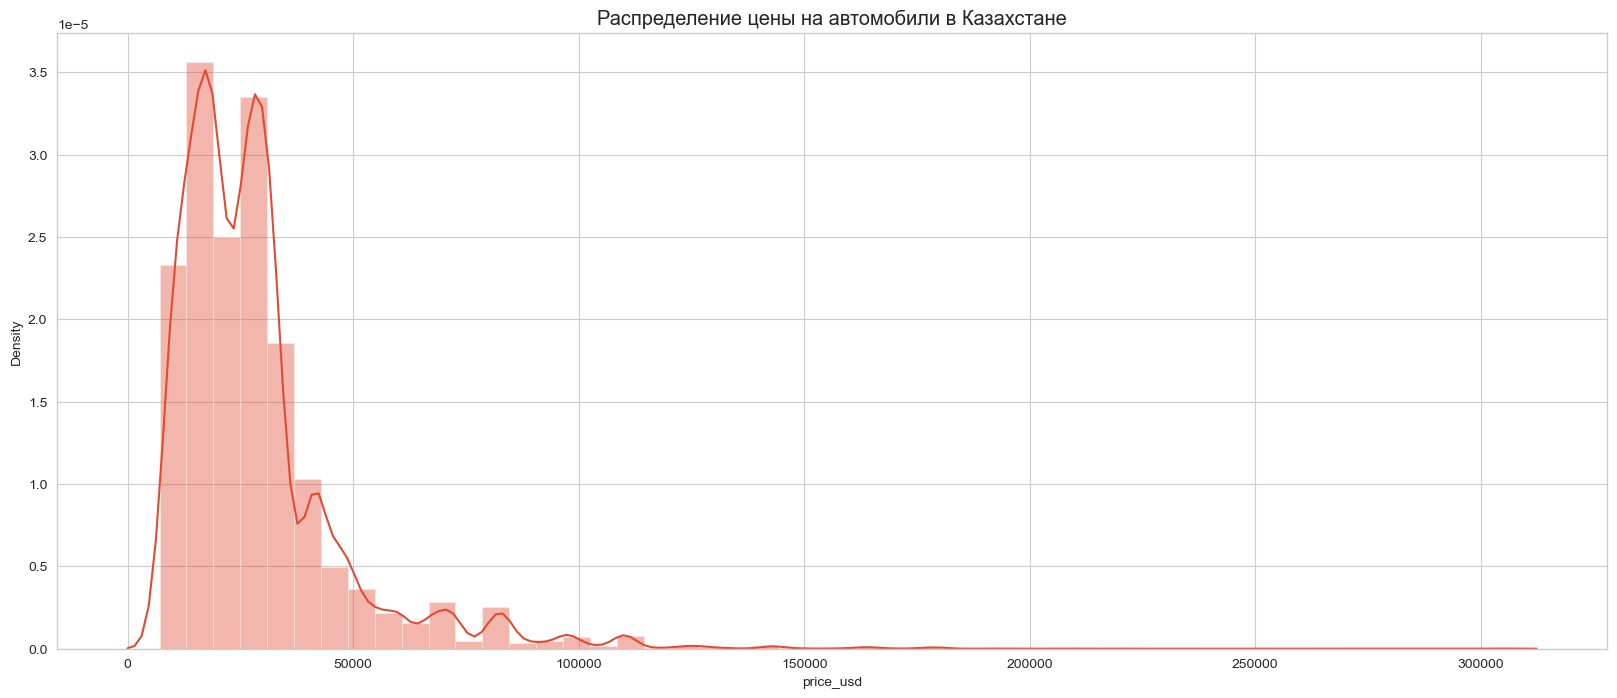

In [94]:
# построим гистограмму цен на автомобили
plt.figure(figsize=(20, 8))
sns.distplot(df.price_usd)
plt.title('Распределение цены на автомобили в Казахстане')
plt.show()

In [95]:
print(f'Минимум: {df.price_usd.min()} \
      среднее: {df.price_usd.mean():.2f} \
      максимум: {df.price_usd.max():.2f}')

Минимум: 7100.0       среднее: 28560.54       максимум: 305252.02


<font face='liberation serif' size=4>Имеем подобие биноминального распределения с хвостом. Основная масса цен укладывается в диапазон 10-50 тысяч с пиками 18 и 30 тысяч. 

Ради интереса посмотрим на продажи за триста тысяч</font>

In [96]:
df.query('price_usd > 300000')

,company,brand,model,release_year,manufacturing_country,fuel_type,engine_volume,transmission_type,drive_type,region,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,sales_date
20402,Автокапитал,Mercedes-Benz Trucks,Tourismo,2019,TUR,D,12.0,6AT,RWD,Атырау,1,305252.0154,305252.0154,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-05-01
20403,Автокапитал,Mercedes-Benz Trucks,Tourismo,2019,TUR,D,12.0,6AT,RWD,Атырау,1,303650.8783,303650.8783,Атырауская область,Коммерческие автомобили,Большие автобусы,2019-06-01


<font face='liberation serif' size=4>Это туристические автобусы от мерседеса из Турции</font>

<font face='liberation serif' size=4>Построим ящик с усами - видны выбросы после 58 тысяч</font>

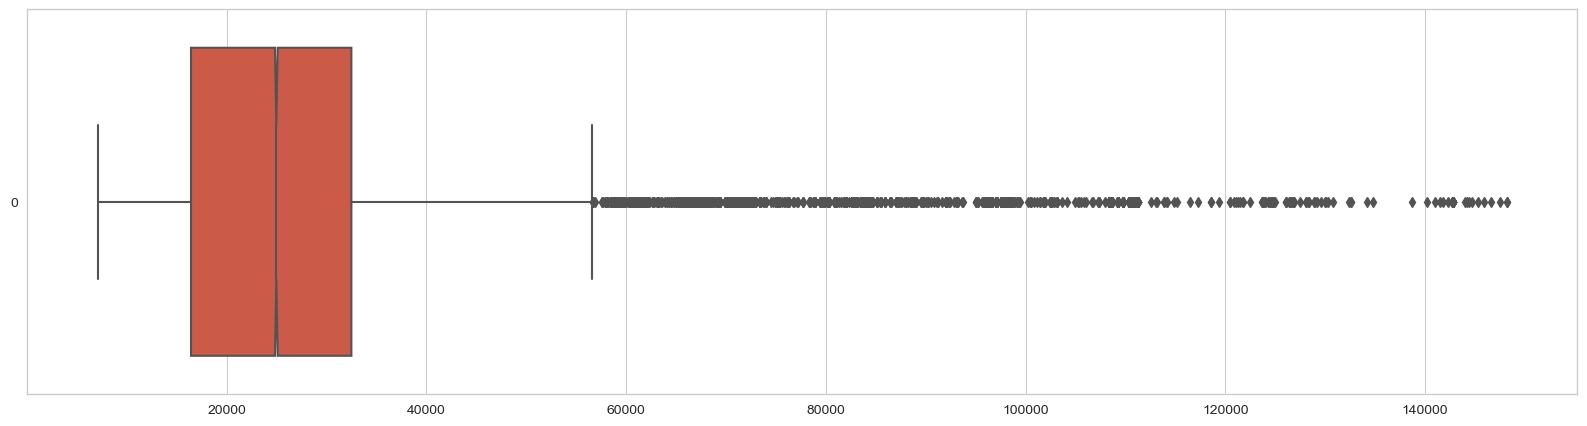

In [109]:
plt.figure(figsize=(20, 5))
sns.boxplot(df.query('price_usd < 150000').price_usd, notch=True, whis=1.5, orient='h');

<font face='liberation serif' size=4>Ради интереса почистим цены межквартильным размахом, в итоговом датасете мы не будем использовать очищенные данные, так как и эти продажи могут понадобиться.</font>

In [98]:
# считаем перваый и третьий квартили
q1, q3 = np.quantile(df.price_usd, [.25, .75])

In [99]:
# находим межквартильный размах
iqr = q3 - q1

In [100]:
# определяем границы цен, путем вычитания 1.5 размахов от 1 кваритиля и добавления 1.5 размахов к 3 кваритилю
low, top = q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [101]:
price_without_outliers = df.query('(price_usd > @low) and (price_usd < @top)')

In [102]:
print(len(price_without_outliers) / df.shape[0])

0.9280767794028907


<font face='liberation serif' size=4>Отсеклось порядка 7 процентов выбросов</font>

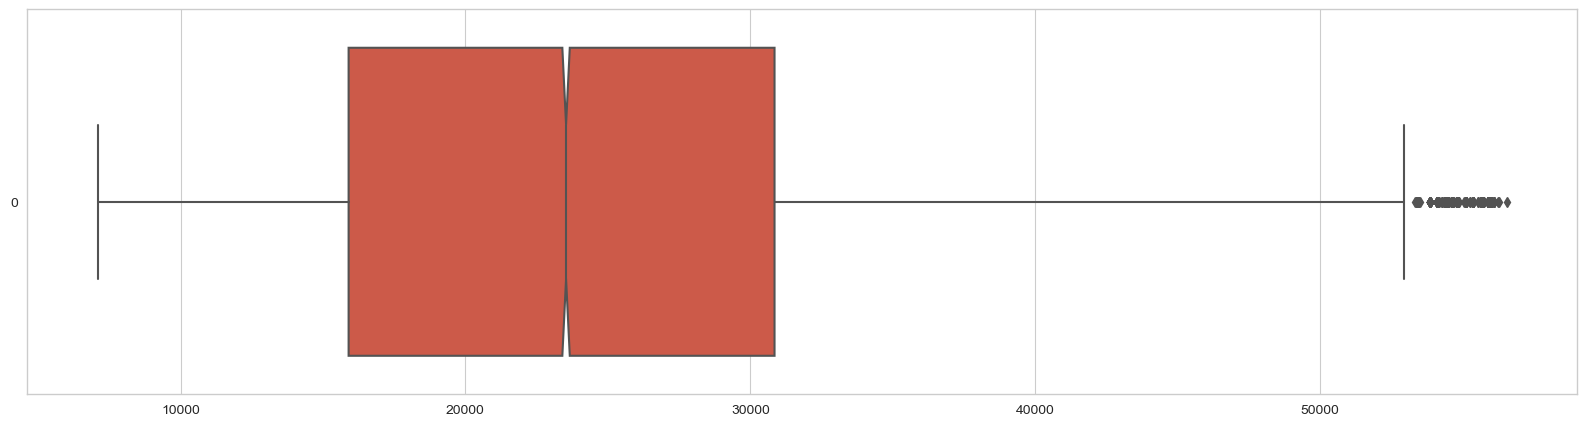

In [110]:
plt.figure(figsize=(20, 5))
sns.boxplot(price_without_outliers.price_usd, notch=True, whis=1.5, orient='h');

<font face='liberation serif' size=4>Ценовой диапазон: от 8 до 58 тысяч, средняя цена 24 тысячи</font>

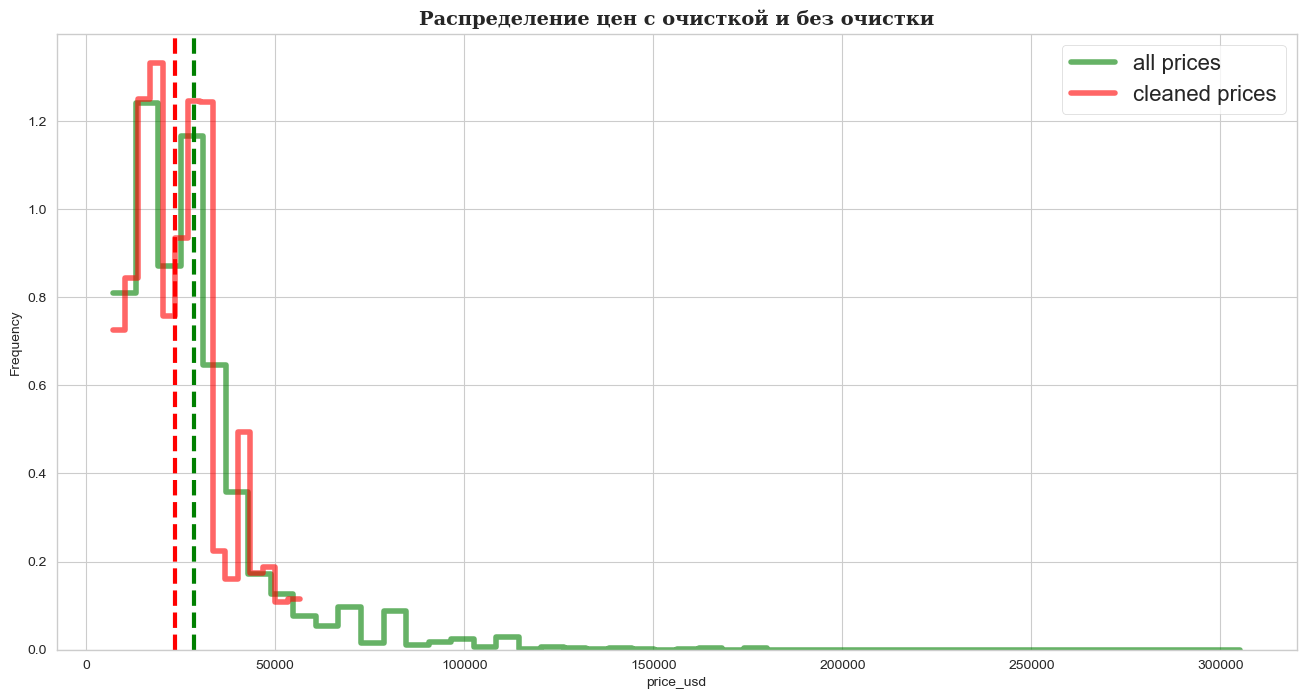

In [104]:
# отрисуем чистые цены и все цены на одном графике
plt.figure(figsize=(16, 8))

sns.histplot(df.price_usd, element='step', stat='frequency',
             bins=50, fill=False, linewidth=4, 
             color='green', alpha=.6,
            label='all prices')
sns.histplot(price_without_outliers.price_usd, element='step', stat='frequency',
             bins=15, fill=False, linewidth=4, 
             color='red', alpha=.6,
            label='cleaned prices')

plt.axvline(x=price_without_outliers.price_usd.median(), color='red', linestyle='--', linewidth=3)
plt.axvline(x=df.price_usd.mean(), color='green', linestyle='--', linewidth=3)

plt.title('Распределение цен с очисткой и без очистки', font='serif', fontsize=14, weight='bold')
plt.legend(fontsize=16)
plt.show()

<font face='liberation serif' size=4>Интерквартильный размах избавляет нас от хвоста и данные становятся более однородными, однако, в итоговый датасет я перенесу все данные, так как не известно какие данные понадобятся для анализа.</font>

<font face='liberation serif' size=5 color='royalblue'>**Датасет очищен и подготовлен для анализа**</font>

In [105]:
cat_columns = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013']

In [106]:
for col in cat_columns:
    df[col] = df[col].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34801 entries, 0 to 39950
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   company                34801 non-null  object  
 1   brand                  34801 non-null  object  
 2   model                  34801 non-null  object  
 3   release_year           34801 non-null  int32   
 4   manufacturing_country  34801 non-null  object  
 5   fuel_type              34801 non-null  category
 6   engine_volume          34801 non-null  float64 
 7   transmission_type      34801 non-null  category
 8   drive_type             34801 non-null  category
 9   region                 34801 non-null  object  
 10  quantity               34801 non-null  int32   
 11  price_usd              34801 non-null  float64 
 12  sell_price_usd         34801 non-null  float64 
 13  state                  34801 non-null  object  
 14  segment_2013           34801 non-null  cate

In [108]:
# сохраняем датасет в файл
df.to_csv('clean_auto_kz.csv')

<div class="alert alert-block alert-success">   
    
<font face='Liberation serif' size=3 color='black'>**Описание данных:**
- **company:** Наименование дилера
- **brand:** Наименование бренда 
- **model:** Наименование модели автомобиля 
- **release_year:** Год выпуска автомобиля 
- **manufacturing_country:** Наименование страны-производителя
- **fuel_type:** Тип топлива, используемый автомобилем 
- **engine_volume:** Объем двигателя 
- **transmission_type:** Тип трансмиссии 
- **drive_type:** Тип привода
- **region:** Район 
- **quantity:** Количество проданных автомобилей в заказе
- **price_usd:** Цена автомобиля в долларах
- **sell_price_usd:** Общая стоимость заказа
- **state:** Область
- **segment_2013:** Сегмент
- **class_2013:** Класс
- **sales_date:** Дата продажи</font>
    
</div>